# Complete Absenteeism Project (Cleaning - Preprocessing - Analysis - Vizualisation)

### Objective
Go throw all the process of Data Analysis by using python and some of libraiies such as Pandas, Numpy, Matplotlib and Seaborn. That will help me to search, pratice and gain experience on using python.
### About Data
Data is related to absenteeism at work.

# Import packages

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import raw data as 'raw_data'

In [225]:
raw_data = pd.read_csv('Absenteeism-data.csv')
raw_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


# Copy raw_data to 'df

In [226]:
df = raw_data.copy()
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


# Display informations about 'df'

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


# Show all columns and rows

In [228]:
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
#display(df)

# Data cleaning and preprocessing 

## Remove Nan and Dupplicated

In [229]:
# Display Nan
df.isna().head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [230]:
# Count Nan
df.isna().value_counts()

ID     Reason for Absence  Date   Transportation Expense  Distance to Work  Age    Daily Work Load Average  Body Mass Index  Education  Children  Pets   Absenteeism Time in Hours
False  False               False  False                   False             False  False                    False            False      False     False  False                        700
Name: count, dtype: int64

In [231]:
# Display dupplicated
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool

In [232]:
# Count dupplicated
df.duplicated().value_counts()

False    692
True       8
Name: count, dtype: int64

In [233]:
# Show dupplicated values
dup = df.value_counts()
dup.head(10)

ID  Reason for Absence  Date        Transportation Expense  Distance to Work  Age  Daily Work Load Average  Body Mass Index  Education  Children  Pets  Absenteeism Time in Hours
34  27                  13/01/2016  118                     10                37   308.593                  28               1          0         0     2                            2
24  28                  25/07/2017  246                     25                41   230.290                  23               1          0         0     2                            2
5   23                  19/10/2016  235                     20                43   265.017                  38               1          1         0     2                            2
3   27                  24/02/2017  179                     51                38   251.818                  31               1          0         0     3                            2
                        22/02/2017  179                     51                38   251.818

In [234]:
# Verify if ID 34 is dupplicated or not
verif = df[(df["ID"] == 34) & (df["Date"]=="13/01/2016")]
verif

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
124,34,27,13/01/2016,118,10,37,308.593,28,1,0,0,2
131,34,27,13/01/2016,118,10,37,308.593,28,1,0,0,2


In [235]:
# drop dupplicated
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         692 non-null    int64  
 1   Reason for Absence         692 non-null    int64  
 2   Date                       692 non-null    object 
 3   Transportation Expense     692 non-null    int64  
 4   Distance to Work           692 non-null    int64  
 5   Age                        692 non-null    int64  
 6   Daily Work Load Average    692 non-null    float64
 7   Body Mass Index            692 non-null    int64  
 8   Education                  692 non-null    int64  
 9   Children                   692 non-null    int64  
 10  Pets                       692 non-null    int64  
 11  Absenteeism Time in Hours  692 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 70.3+ KB


## Change Date Dtype and recup Year, Month, Day and Day of Week

In [236]:
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')
df["Date"].info()

<class 'pandas.core.series.Series'>
Index: 692 entries, 0 to 699
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
692 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 10.8 KB


In [237]:
# Recup Year, Month, Day and Day of Week
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day of Week"] = df["Date"].dt.day_name()
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Year,Month,Day,Day of Week
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,2015,7,7,Tuesday
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,2015,7,14,Tuesday
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,2015,7,15,Wednesday
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,4,2015,7,16,Thursday
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,2,2015,7,23,Thursday


## Work on 'Education'
Information : Educaltion columns have 4 uniques values : 4 = PhD, 3 = Bachelor , 2 = Master and 1 = Associate

In [238]:
# Display 'Education'
df['Education'].value_counts()

Education
1    575
3     73
2     40
4      4
Name: count, dtype: int64

In [239]:
df["Education"] = df["Education"].map({1:"Associate",3:"Bachelor",2:"Master",4:"PhD"})
df["Education"].head()

0    Associate
1    Associate
2    Associate
3    Associate
4    Associate
Name: Education, dtype: object

# Checkpoint

In [240]:
checkpoint = df.copy()
checkpoint.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Year,Month,Day,Day of Week
0,11,26,2015-07-07,289,36,33,239.554,30,Associate,2,1,4,2015,7,7,Tuesday
1,36,0,2015-07-14,118,13,50,239.554,31,Associate,1,0,0,2015,7,14,Tuesday
2,3,23,2015-07-15,179,51,38,239.554,31,Associate,0,0,2,2015,7,15,Wednesday
3,7,7,2015-07-16,279,5,39,239.554,24,Associate,2,0,4,2015,7,16,Thursday
4,11,23,2015-07-23,289,36,33,239.554,30,Associate,2,1,2,2015,7,23,Thursday


## Get dummies (Raeson for Absence)

In [241]:
checkpoint["Reason for Absence"]

0      26
1       0
2      23
3       7
4      23
       ..
695    10
696     6
697    10
698    23
699    28
Name: Reason for Absence, Length: 692, dtype: int64

In [242]:
absence = pd.get_dummies(checkpoint["Reason for Absence"], dtype=int)
absence

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [243]:
absence["Check"] = absence.sum(axis=1)
absence

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,Check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [244]:
absence["Check"].sum(axis=0)

692

In [245]:
absence.drop(["Check"], axis=1, inplace = True)
absence

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [246]:
# Put reason for absence together
reason_1 = absence.loc[:,0:14].max(axis=1)
reason_2 = absence.loc[:,15:17].max(axis=1)
reason_3 = absence.loc[:,18:21].max(axis=1)
reason_4 = absence.loc[:,22:].max(axis=1)

In [247]:
reason_4

0      1
1      0
2      1
3      0
4      1
      ..
695    0
696    0
697    0
698    1
699    1
Length: 692, dtype: int64

In [248]:
checkpoint = pd.concat([checkpoint, reason_1, reason_2, reason_3, reason_4], axis=1)
checkpoint

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Year,Month,Day,Day of Week,0,1,2,3
0,11,26,2015-07-07,289,36,33,239.554,30,Associate,2,1,4,2015,7,7,Tuesday,0,0,0,1
1,36,0,2015-07-14,118,13,50,239.554,31,Associate,1,0,0,2015,7,14,Tuesday,1,0,0,0
2,3,23,2015-07-15,179,51,38,239.554,31,Associate,0,0,2,2015,7,15,Wednesday,0,0,0,1
3,7,7,2015-07-16,279,5,39,239.554,24,Associate,2,0,4,2015,7,16,Thursday,1,0,0,0
4,11,23,2015-07-23,289,36,33,239.554,30,Associate,2,1,2,2015,7,23,Thursday,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,2018-05-23,179,22,40,237.656,22,Master,2,0,8,2018,5,23,Wednesday,1,0,0,0
696,28,6,2018-05-23,225,26,28,237.656,24,Associate,1,2,3,2018,5,23,Wednesday,1,0,0,0
697,18,10,2018-05-24,330,16,28,237.656,25,Master,0,0,8,2018,5,24,Thursday,1,0,0,0
698,25,23,2018-05-24,235,16,32,237.656,25,Bachelor,0,0,2,2018,5,24,Thursday,0,0,0,1


In [249]:
# Rename 0, 1, 2, 3 and 4
checkpoint.columns.values

array(['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'Year', 'Month', 'Day', 'Day of Week',
       0, 1, 2, 3], dtype=object)

In [250]:
# New columns names
new_columns = ['ID', 'Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'Year', 'Month', 'Day', 'Day of Week',
       'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [251]:
checkpoint.columns = new_columns

In [252]:
checkpoint

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Year,Month,Day,Day of Week,Reason_1,Reason_2,Reason_3,Reason_4
0,11,26,2015-07-07,289,36,33,239.554,30,Associate,2,1,4,2015,7,7,Tuesday,0,0,0,1
1,36,0,2015-07-14,118,13,50,239.554,31,Associate,1,0,0,2015,7,14,Tuesday,1,0,0,0
2,3,23,2015-07-15,179,51,38,239.554,31,Associate,0,0,2,2015,7,15,Wednesday,0,0,0,1
3,7,7,2015-07-16,279,5,39,239.554,24,Associate,2,0,4,2015,7,16,Thursday,1,0,0,0
4,11,23,2015-07-23,289,36,33,239.554,30,Associate,2,1,2,2015,7,23,Thursday,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,2018-05-23,179,22,40,237.656,22,Master,2,0,8,2018,5,23,Wednesday,1,0,0,0
696,28,6,2018-05-23,225,26,28,237.656,24,Associate,1,2,3,2018,5,23,Wednesday,1,0,0,0
697,18,10,2018-05-24,330,16,28,237.656,25,Master,0,0,8,2018,5,24,Thursday,1,0,0,0
698,25,23,2018-05-24,235,16,32,237.656,25,Bachelor,0,0,2,2018,5,24,Thursday,0,0,0,1


In [253]:
# Reorganized columns
reorganized = ['ID', 'Reason for Absence','Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date','Year', 'Month', 'Day', 'Day of Week', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'
       ]

In [254]:
checkpoint = checkpoint[reorganized]

In [255]:
checkpoint

,ID,Reason for Absence,Reason_1,Reason_2,Reason_3,Reason_4,Date,Year,Month,Day,Day of Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,0,0,0,1,2015-07-07,2015,7,7,Tuesday,289,36,33,239.554,30,Associate,2,1,4
1,36,0,1,0,0,0,2015-07-14,2015,7,14,Tuesday,118,13,50,239.554,31,Associate,1,0,0
2,3,23,0,0,0,1,2015-07-15,2015,7,15,Wednesday,179,51,38,239.554,31,Associate,0,0,2
3,7,7,1,0,0,0,2015-07-16,2015,7,16,Thursday,279,5,39,239.554,24,Associate,2,0,4
4,11,23,0,0,0,1,2015-07-23,2015,7,23,Thursday,289,36,33,239.554,30,Associate,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,1,0,0,0,2018-05-23,2018,5,23,Wednesday,179,22,40,237.656,22,Master,2,0,8
696,28,6,1,0,0,0,2018-05-23,2018,5,23,Wednesday,225,26,28,237.656,24,Associate,1,2,3
697,18,10,1,0,0,0,2018-05-24,2018,5,24,Thursday,330,16,28,237.656,25,Master,0,0,8
698,25,23,0,0,0,1,2018-05-24,2018,5,24,Thursday,235,16,32,237.656,25,Bachelor,0,0,2


# Data cleaned

In [256]:
cleaned_data = checkpoint.copy()
cleaned_data.head()

,ID,Reason for Absence,Reason_1,Reason_2,Reason_3,Reason_4,Date,Year,Month,Day,Day of Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,0,0,0,1,2015-07-07,2015,7,7,Tuesday,289,36,33,239.554,30,Associate,2,1,4
1,36,0,1,0,0,0,2015-07-14,2015,7,14,Tuesday,118,13,50,239.554,31,Associate,1,0,0
2,3,23,0,0,0,1,2015-07-15,2015,7,15,Wednesday,179,51,38,239.554,31,Associate,0,0,2
3,7,7,1,0,0,0,2015-07-16,2015,7,16,Thursday,279,5,39,239.554,24,Associate,2,0,4
4,11,23,0,0,0,1,2015-07-23,2015,7,23,Thursday,289,36,33,239.554,30,Associate,2,1,2


In [257]:
# Export cleaned_data as absenteeism-cleaned_data.csv
cleaned_data.to_csv("Absenteeism_cleaned_data.csv")

# Data exploration

In [258]:
cleaned_data["Absenteeism Time in Hours"].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48])

In [259]:
cleaned_data["Absenteeism Time in Hours"].value_counts()

Absenteeism Time in Hours
8      195
2      144
3      104
1       86
4       57
0       39
16      18
24      15
5        7
40       7
32       6
64       3
56       2
80       2
120      2
112      2
7        1
104      1
48       1
Name: count, dtype: int64

In [260]:
cleaned_data

,ID,Reason for Absence,Reason_1,Reason_2,Reason_3,Reason_4,Date,Year,Month,Day,Day of Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,0,0,0,1,2015-07-07,2015,7,7,Tuesday,289,36,33,239.554,30,Associate,2,1,4
1,36,0,1,0,0,0,2015-07-14,2015,7,14,Tuesday,118,13,50,239.554,31,Associate,1,0,0
2,3,23,0,0,0,1,2015-07-15,2015,7,15,Wednesday,179,51,38,239.554,31,Associate,0,0,2
3,7,7,1,0,0,0,2015-07-16,2015,7,16,Thursday,279,5,39,239.554,24,Associate,2,0,4
4,11,23,0,0,0,1,2015-07-23,2015,7,23,Thursday,289,36,33,239.554,30,Associate,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,1,0,0,0,2018-05-23,2018,5,23,Wednesday,179,22,40,237.656,22,Master,2,0,8
696,28,6,1,0,0,0,2018-05-23,2018,5,23,Wednesday,225,26,28,237.656,24,Associate,1,2,3
697,18,10,1,0,0,0,2018-05-24,2018,5,24,Thursday,330,16,28,237.656,25,Master,0,0,8
698,25,23,0,0,0,1,2018-05-24,2018,5,24,Thursday,235,16,32,237.656,25,Bachelor,0,0,2


## 1. What is the total of Absenteeism time in Hour ?

In [261]:
#Total time of Abseenteeism
cleaned_data["Absenteeism Time in Hours"].sum(axis=0)

4716

## Result 1 : 4716 hours of absenteism

In [262]:
# Describe of Absenteeism Time in Hours
cleaned_data["Absenteeism Time in Hours"].describe()

count    692.000000
mean       6.815029
std       12.733170
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism Time in Hours, dtype: float64

### EXPLANATION

Au total, 692 absences ont été enregistrées.\
La moyenne des absences est de 6,815029 heures.\
L'écart-type est de 12,7333170 heures, signifiant que les heures d'absence varient considérablement autour de la moyenne.\
Le minimum d'heure d'absence est de 0 et le maximum est de 120 heures.\
25% des absences ont duré 2 heures. La moitié (médiane) a duré moins de 3 heures.75% a duré 8 heures.\
Au total, les retards ont duré 4716 heures. 

## 2. How are absences distributed by year ?

In [263]:
# Absences by year 2015, 2016, 2017 and 2018
grouped_year = cleaned_data[["Year", "Absenteeism Time in Hours"]].groupby("Year").sum()
grouped_year

,Absenteeism Time in Hours
Year,
2015,769
2016,1718
2017,1364
2018,865


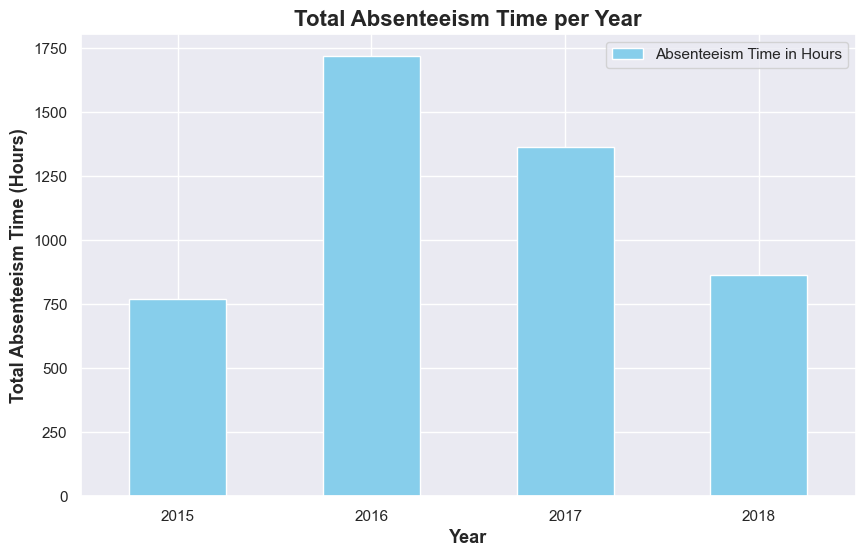

In [283]:
grouped_year.plot(kind="bar", figsize=(10,6), subplots= True, color='skyblue')
plt.xlabel("Year", fontsize=13, weight='bold')
plt.ylabel("Total Absenteeism Time (Hours)", fontsize=13, fontweight= 'bold')
plt.title("Total Absenteeism Time per Year", fontsize=16, fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [276]:
grouped_month = cleaned_data["Day of Week"].value_counts()
grouped_month

Day of Week
Wednesday    151
Monday       140
Tuesday      138
Friday       131
Thursday     119
Sunday         9
Saturday       4
Name: count, dtype: int64

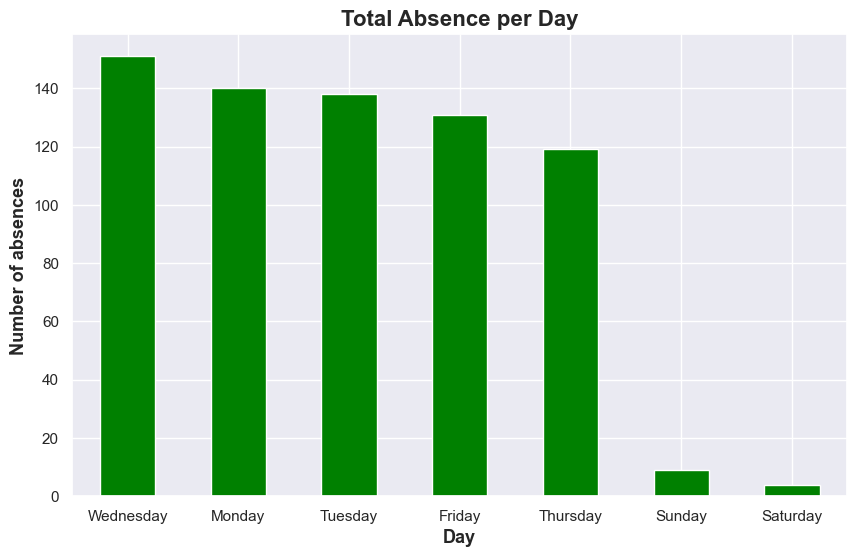

In [287]:
grouped_month.plot(kind='bar', figsize=(10,6), color='green')
plt.xlabel("Day", fontsize= 13, fontweight='bold')
plt.ylabel("Number of absences", fontsize=13, fontweight='bold')
plt.title('Total Absence per Day', fontsize=16, fontweight='bold')
plt.xticks(rotation=0)
plt.show()